
# Photometric redshifts

This example simulates galaxies with a simple photometric redshift model.


## Setup
The simplest galaxies-only GLASS simulation, sampling galaxies using some
redshift distribution.  Then add a model for photometric redshifts with
Gaussian errors.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# almost all GLASS functionality is available from the `glass` namespace
import glass

# how many arcmin2 over the entire sphere
ARCMIN2_SPHERE = 60**6 // 100 / np.pi

# creating a numpy random number generator for sampling
rng = np.random.default_rng(seed=42)

# galaxy density
n_arcmin2 = 1e-4

# photometric redshift error at redshift 0
phz_sigma_0 = 0.05

# parametric galaxy redshift distribution
z = np.linspace(0, 3, 301)
dndz = n_arcmin2 * glass.smail_nz(z, 1.0, 2.2, 1.5)

# compute the over galaxy number density on the sphere
ngal = np.trapezoid(dndz, z)

## Simulation
Simulate true and photometric redshifts.



In [ ]:
# sample the number (not density) of galaxies from the Poisson distribution
n = rng.poisson(ngal * ARCMIN2_SPHERE)

# sample n true redshifts
ztrue = glass.redshifts_from_nz(n, z, dndz, rng=rng, warn=False)

# sample n photometric redshifts
zphot = glass.gaussian_phz(ztrue, phz_sigma_0, rng=rng)

## Plots
Make a couple of typical photometric redshift plots.

First the $z$-vs-$z$ plot across the entire sample.  The simple
Gaussian error model only has the diagonal but no catastrophic outliers.



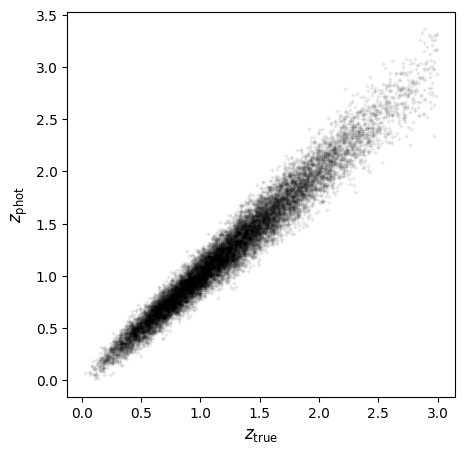

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(ztrue, zphot, "+k", ms=3, alpha=0.1)
plt.xlabel(r"$z_{\rm true}$", size=12)
plt.ylabel(r"$z_{\rm phot}$", size=12)
plt.show()

Now define a number of photometric redshift bins.  They are chosen by the
:func:`~glass.equal_dens_zbins` function to produce the same
number of galaxies in each bin.



In [ ]:
nbins = 5
zbins = glass.equal_dens_zbins(z, dndz, nbins)

After the photometric bins are defined, make histograms of the *true* redshift
distribution $n(z)$ using the *photometric* redshifts for binning.  Use
the :func:`~glass.tomo_nz_gausserr()` function to also plot the
expected tomographic redshift distributions with the same model.



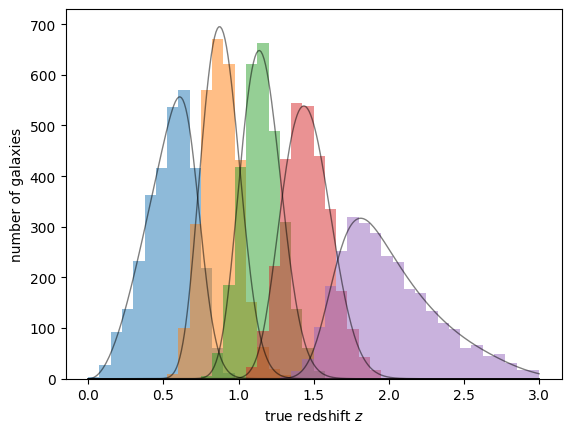

In [ ]:
tomo_nz = glass.tomo_nz_gausserr(z, dndz, phz_sigma_0, zbins)
tomo_nz *= ARCMIN2_SPHERE * (z[-1] - z[0]) / 40

for (z1, z2), nz in zip(zbins, tomo_nz, strict=False):
    plt.hist(
        ztrue[(z1 <= zphot) & (zphot < z2)],
        bins=40,
        range=(z[0], z[-1]),
        histtype="stepfilled",
        alpha=0.5,
    )
    plt.plot(z, nz, "-k", lw=1, alpha=0.5)
plt.xlabel("true redshift $z$")
plt.ylabel("number of galaxies")
plt.show()